<a href="https://colab.research.google.com/github/ratnesh003/Learning-NLP/blob/main/Assignment%202/NLP_LAB_2_UI21CS48.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Job Skills Data Set Analysis


## Dependencies

In [167]:
!pip install nltk
!pip install seaborn
!pip install matplotlib
!pip install pandas
!pip install numpy

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import cmudict
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('cmudict')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


True

## Mounting Dataset from Google Drive

In [169]:
from google.colab import drive
drive.mount('/content/drive')
!ls /content/drive/MyDrive/ML

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
B2.csv			 Job_skills.csv     magic04.data  train.csv
dhoniretires_tweets.csv  Job_skills.gsheet  spam.csv	  word_analysis.csv


In [170]:
JD_dataset = pd.read_csv('/content/drive/MyDrive/ML/Job_skills.csv')

In [171]:
JD_dataset.head(5)

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...


In [172]:
JD_dataset.isnull().sum()
JD_dataset = JD_dataset.fillna('')

In [173]:
JD_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Company                   1250 non-null   object
 1   Title                     1250 non-null   object
 2   Category                  1250 non-null   object
 3   Location                  1250 non-null   object
 4   Responsibilities          1250 non-null   object
 5   Minimum Qualifications    1250 non-null   object
 6   Preferred Qualifications  1250 non-null   object
dtypes: object(7)
memory usage: 68.5+ KB


In [174]:
JD_dataset.head(5)

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...


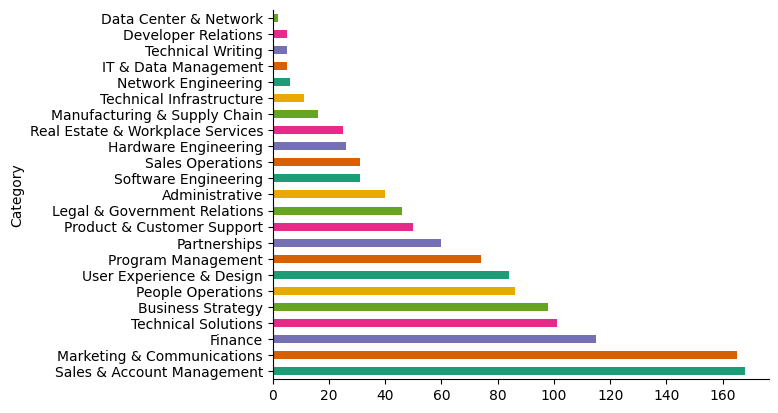

In [175]:
JD_dataset['Category'].unique()
JD_dataset['Category'].value_counts().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

In [176]:
JD_dataset = JD_dataset.drop(columns=['Company', 'Title', 'Location'])
JD_dataset.head(5)

,Category,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Program Management,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Manufacturing & Supply Chain,Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Technical Solutions,Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,Developer Relations,"Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,Program Management,Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...


In [177]:
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [178]:
JD_dataset['Details'] = JD_dataset['Responsibilities'] + ' ' + JD_dataset['Minimum Qualifications'] + ' ' + JD_dataset['Preferred Qualifications']
JD_dataset = JD_dataset.drop(columns=['Responsibilities', 'Minimum Qualifications', 'Preferred Qualifications'])
JD_dataset['Details'] = JD_dataset['Details'].str.lower()

lemmatizer = WordNetLemmatizer()
JD_dataset['Details'] = JD_dataset['Details'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split('.')]))
JD_dataset.head(5)

JD_dataset['Details'] = JD_dataset['Details'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
JD_dataset.head(5)

,Category,Details
0,Program Management,"shape, shepherd, ship, show technical programs..."
1,Manufacturing & Supply Chain,drive cross-functional activities supply chain...
2,Technical Solutions,collect analyze data draw insight identify str...
3,Developer Relations,"work one-on-one top android, ios, web engineer..."
4,Program Management,plan requirements internal customers provide p...


In [179]:
stemmer = SnowballStemmer('english')
JD_dataset['Details'] = JD_dataset['Details'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
JD_dataset.head(5)

,Category,Details
0,Program Management,"shape, shepherd, ship, show technic program de..."
1,Manufacturing & Supply Chain,drive cross-funct activ suppli chain overal te...
2,Technical Solutions,collect analyz data draw insight identifi stra...
3,Developer Relations,"work one-on-on top android, ios, web engin bui..."
4,Program Management,plan requir intern custom provid portfolio rep...


In [180]:
pattern = r'[^\w\s]'
JD_dataset['Details'] = JD_dataset['Details'].replace(pattern, ' ', regex=True)
JD_dataset.head(5)

,Category,Details
0,Program Management,shape shepherd ship show technic program de...
1,Manufacturing & Supply Chain,drive cross funct activ suppli chain overal te...
2,Technical Solutions,collect analyz data draw insight identifi stra...
3,Developer Relations,work one on on top android ios web engin bui...
4,Program Management,plan requir intern custom provid portfolio rep...


In [184]:
syllable_dict = cmudict.dict()

def count_syllables(word):
    if word.lower() not in syllable_dict:
        return 0
    return [len(list(y for y in x if y[-1].isdigit())) for x in syllable_dict[word.lower()]][0]

def is_complex(word):
    syllable_count = count_syllables(word)
    if(syllable_count > 2): return True
    else:  return False

def count_complex_words(text):
    words = word_tokenize(text)
    num_complex_words = sum(is_complex(word) for word in words)
    return num_complex_words

JD_dataset['complex_word_count'] = JD_dataset['Details'].apply(count_complex_words)
JD_dataset.head(5)

,Category,Details,complex_word_count
0,Program Management,shape shepherd ship show technic program de...,16
1,Manufacturing & Supply Chain,drive cross funct activ suppli chain overal te...,22
2,Technical Solutions,collect analyz data draw insight identifi stra...,10
3,Developer Relations,work one on on top android ios web engin bui...,17
4,Program Management,plan requir intern custom provid portfolio rep...,7


In [185]:
def complex_word_percentage(text):
    words = word_tokenize(text)
    num_complex_words = sum(is_complex(word) for word in words)
    if(len(words) !=0 ): total_words = len(words)
    else: total_words = 1
    return (num_complex_words / total_words) * 100

JD_dataset['complex_word_percentage'] = JD_dataset['Details'].apply(complex_word_percentage)
JD_dataset.head(5)

,Category,Details,complex_word_count,complex_word_percentage
0,Program Management,shape shepherd ship show technic program de...,16,10.191083
1,Manufacturing & Supply Chain,drive cross funct activ suppli chain overal te...,22,11.282051
2,Technical Solutions,collect analyz data draw insight identifi stra...,10,10.309278
3,Developer Relations,work one on on top android ios web engin bui...,17,14.782609
4,Program Management,plan requir intern custom provid portfolio rep...,7,5.147059


In [186]:
def calculate_avg_word_length(text):
    words = text.split()
    total_characters = sum(len(word) for word in words)
    if(len(words) !=0 ): num_words = len(words)
    else: num_words = 1
    avg_word_length = total_characters / num_words
    return avg_word_length

JD_dataset['avg_word_length'] = JD_dataset['Details'].apply(calculate_avg_word_length)
JD_dataset.head(5)

,Category,Details,complex_word_count,complex_word_percentage,avg_word_length
0,Program Management,shape shepherd ship show technic program de...,16,10.191083,6.070064
1,Manufacturing & Supply Chain,drive cross funct activ suppli chain overal te...,22,11.282051,5.943590
2,Technical Solutions,collect analyz data draw insight identifi stra...,10,10.309278,6.010309
3,Developer Relations,work one on on top android ios web engin bui...,17,14.782609,5.469565
4,Program Management,plan requir intern custom provid portfolio rep...,7,5.147059,5.845588


In [187]:
import pandas as pd
from collections import defaultdict

word_freq_by_category = defaultdict(lambda: defaultdict(int))

for index, row in JD_dataset.iterrows():
    category = row['Category']
    details = row['Details']
    for word in details.split():
        word_freq_by_category[category][word] += 1

df_word_freq = pd.DataFrame({
    'Category': [],
    'Word': [],
    'Frequency': [],
    'isComplex': []
})

for category, word_freq in word_freq_by_category.items():
    for word, freq in word_freq.items():
        if freq >= 90 and freq <= 200:
            df_word_freq = pd.concat([df_word_freq, pd.DataFrame({'Category': [category], 'Word': [word], 'Frequency': [freq], 'isComplex':[bool(is_complex(word))]})], ignore_index=True)

df_word_freq.head(5)

,Category,Word,Frequency,isComplex
0,Program Management,technic,112.0,0.0
1,Program Management,program,125.0,False
2,Program Management,work,137.0,False
3,Program Management,cloud,112.0,False
4,Program Management,custom,93.0,False


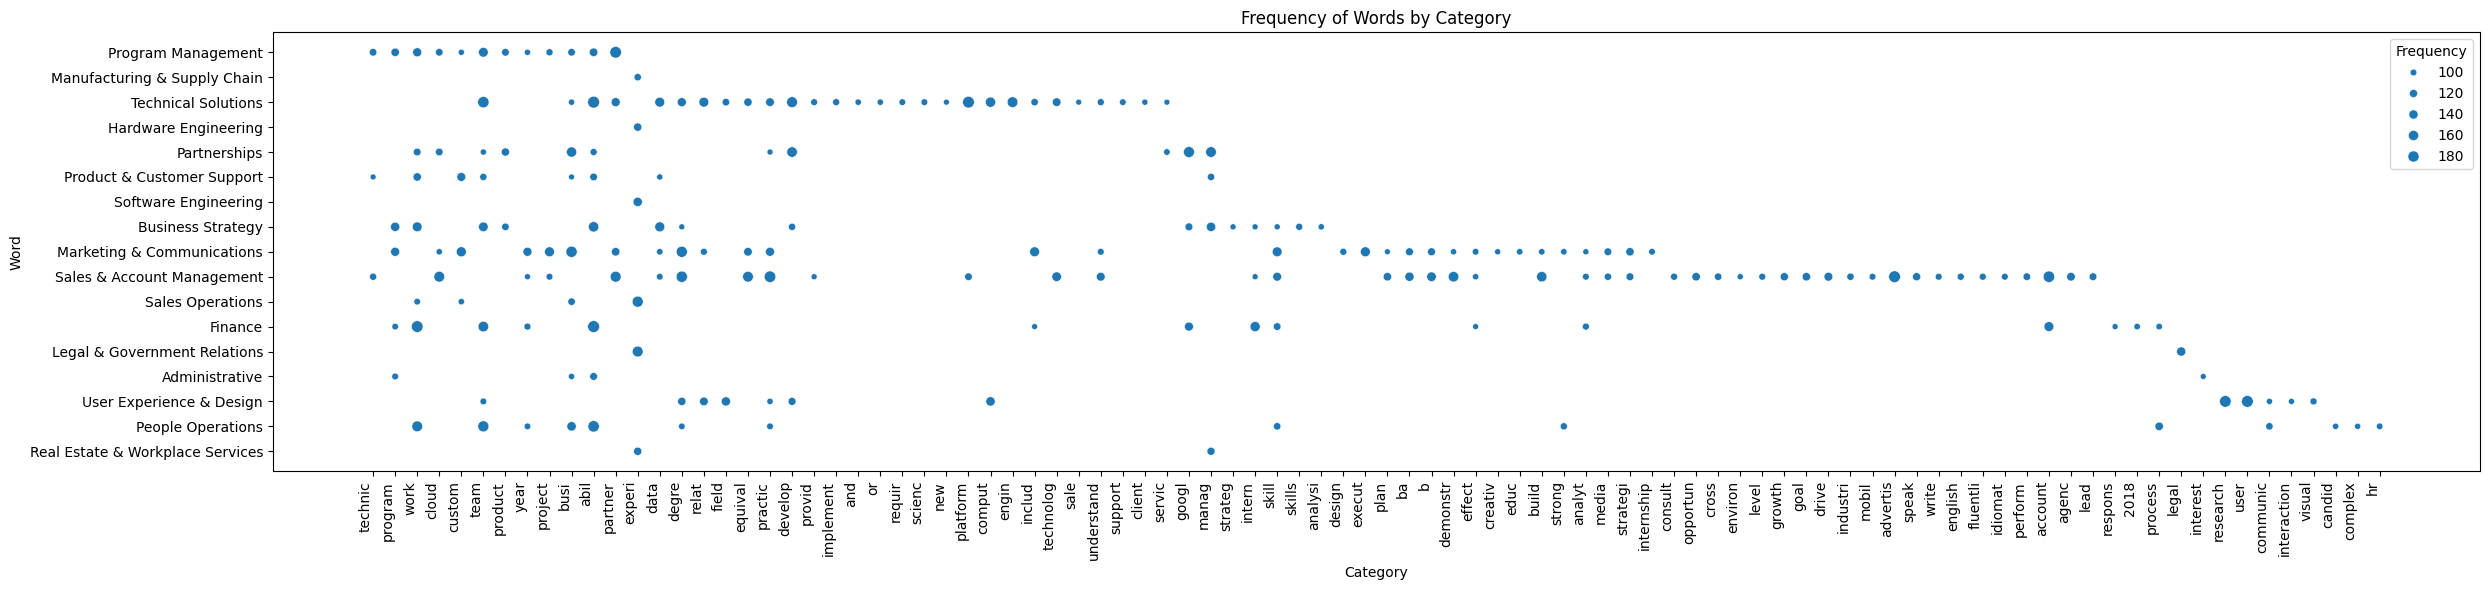

In [188]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 6))
sns.scatterplot(x='Word', y='Category', size='Frequency', data=df_word_freq)
plt.xlabel('Category')
plt.ylabel('Word')
plt.title('Frequency of Words by Category')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


In [189]:
df_pivot = df_word_freq.pivot_table(index='Word', columns='Category', values='Frequency', aggfunc='sum', fill_value=0)
df_pivot.head(10)

Category,Administrative,Business Strategy,Finance,Hardware Engineering,Legal & Government Relations,Manufacturing & Supply Chain,Marketing & Communications,Partnerships,People Operations,Product & Customer Support,Program Management,Real Estate & Workplace Services,Sales & Account Management,Sales Operations,Software Engineering,Technical Solutions,User Experience & Design
Word,,,,,,,,,,,,,,,,,
2018,0.0,0.0,96.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abil,115.0,163.0,197.0,0.0,0.0,0.0,0.0,105.0,186.0,113.0,128.0,0.0,0.0,0.0,0.0,196.0,0.0
account,0.0,0.0,152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,186.0,0.0,0.0,0.0,0.0
advertis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,194.0,0.0,0.0,0.0,0.0
agenc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,129.0,0.0,0.0,0.0,0.0
analysi,0.0,94.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
analyt,0.0,0.0,104.0,0.0,0.0,0.0,92.0,0.0,0.0,0.0,0.0,0.0,101.0,0.0,0.0,0.0,0.0
and,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.0,0.0
b,0.0,0.0,0.0,0.0,0.0,0.0,118.0,0.0,0.0,0.0,0.0,0.0,147.0,0.0,0.0,0.0,0.0
